<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---
# **Tarefa** | Extração de dados do site IMDB
---

# **Tópicos**

<ol type="1">
  <li>Web Crawling;</li>
  <li>Web Scraping;</li>
  <li>Web API.</li>
</ol>

Para realizar esta tarefa, utilizei os pacotes Python requests e beautifulsoup4 para extrair os 10 filmes mais populares do IMDB (título, ano e nota) a partir do link fornecido: IMDB Top 250. O resultado foi salvo em um arquivo CSV chamado imdb.csv.
Nesta tarefa, a utilização do pacote requests para fazer uma requisição HTTP ao IMDB simula o uso de uma Web API para obter dados. Embora o IMDB não tenha sido acessado através de uma API oficial, o processo de fazer uma requisição a um serviço web, receber dados (neste caso, HTML), e processá-los para uso em outra aplicação (escrita em um arquivo CSV), exemplifica como as Web APIs facilitam a comunicação e integração entre sistemas diferentes.

#### Lição 1:

Utilize o pacote Python `requests` para fazer o download do conteúdo do arquivo `robots.txt` do site do IMDB e salve numa variável chamada `robots`, este é o link:

```
https://www.imdb.com/robots.txt

In [1]:
# solução do exercício 1.1

import requests
URL = 'https://www.imdb.com/robots.txt'
robots = requests.get(URL)

conteudo = robots.text
print(conteudo)
print(robots.status_code)

# robots.txt for https://www.imdb.com properties
User-agent: *
Disallow: /OnThisDay
Disallow: /ads/
Disallow: /ap/
Disallow: /mymovies/
Disallow: /r/
Disallow: /register
Disallow: /registration/
Disallow: /search/name-text
Disallow: /search/title-text
Disallow: /find
Disallow: /find$
Disallow: /find/
Disallow: /tvschedule
Disallow: /updates
Disallow: /watch/_ajax/option
Disallow: /_json/video/mon
Disallow: /_json/getAdsForMediaViewer/
Disallow: /list/ls*/_ajax
Disallow: /list/ls*/export
Disallow: /*/*/rg*/mediaviewer/rm*/tr
Disallow: /*/rg*/mediaviewer/rm*/tr
Disallow: /*/mediaviewer/*/tr
Disallow: /title/tt*/mediaviewer/rm*/tr
Disallow: /name/nm*/mediaviewer/rm*/tr
Disallow: /gallery/rg*/mediaviewer/rm*/tr
Disallow: /tr/
Disallow: /title/tt*/watchoptions
Disallow: /search/title/?title_type=feature,tv_movie,tv_miniseries,documentary,short,video,tv_short&release_date=,2020-12-31&lists=%21ls538187658,%21ls539867036,%21ls538186228&view=simple&sort=num_votes,asc&aft
Disallow: /name/nm*/fil


Com o conteúdo na variável `robots`, verifique se a palavra `top` ou `charts` está presente no conteúdo do texto. Se sim, imprima `True`, senão imprima `False`.

In [2]:
import re
ocorrencia_top = re.findall('top', robots.text, re.IGNORECASE)
ocorrencia_chart = re.findall('chart', robots.text, re.IGNORECASE)

if 'top' in ocorrencia_top:
  print(True)
else:
  print(False)

if 'chart' in ocorrencia_top:
  print(True)
else:
  print(False)

False
False


In [3]:
# Sugestão tutorada pela Ebac - Pesquisar pela palavra "Register"

ocorrencia_top = re.findall('register', robots.text, re.IGNORECASE)
if 'register' in ocorrencia_top:
  print(True)
else:
  print(False)

True


Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 filmes mais populares do IMDB, este é o link:

```
https://www.imdb.com/chart/top/
```


```

In [4]:
# a) Utilize o pacote requests para fazer o download da página na variável conteudo

import requests
from requests.exceptions import HTTPError

conteudo = None
URL = 'https://www.imdb.com/chart/top/'


try:
  resposta = requests.get(URL)
except HTTPError as exc:
  print(exc)
else:
  conteudo = resposta.text
print(conteudo)
print(resposta.status_code)

<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
</body>
</html>

403


Este erro ocorre porque uma das medidas de segurança implementadas no site do IMDB para proteger contra abusos, scraping não autorizado, ataques automatizados, entre outros, é a verificação do "User-Agent" da requisição.<br><br>

 O **"User-Agent" é um cabeçalho enviado junto com a requisição** que identifica o *client* que está fazendo a requisição.<br>
 No caso de navegadores web (como Chrome, Edge, etc.), o User-Agent inclui informações sobre o navegador, seu motor de renderização, e até o sistema operacional do dispositivo que está fazendo a requisição.<br><br>


Para contornar isso e simular uma requisição mais "legítima", você pode modificar os cabeçalhos da sua requisição HTTP para incluir um "User-Agent" de um navegador real. Isso é feito passando um dicionário de cabeçalhos para o método "requests.get", onde você define o "User-Agent" para o de um navegador real.

In [1]:
# Ajustando seu código para incluir o "User-Agent" (HEADERS)

import requests
from requests.exceptions import HTTPError

conteudo = None
URL = 'https://www.imdb.com/chart/top/'
HEADERS = {'User-Agent': 'MeuUser-Agent'}

try:
  resposta = requests.get(url=URL, headers=HEADERS)
except HTTPError as exc:
  print(exc)
else:
  conteudo = resposta.text

In [2]:
with open(file='conteudo.html', mode='w', encoding='utf8') as arquivo:
  arquivo.write(conteudo)

In [13]:
!pip install beautifulsoup4

In [3]:
# b) Utilize o pacote beautifulsoup4 para carregar o HTML da variavel conteudo na variavel pagina

from bs4 import BeautifulSoup

pagina = BeautifulSoup(open('conteudo.html', mode='r', encoding='utf8'), 'html.parser')

movies = pagina.find_all('li', class_="ipc-metadata-list-summary-item")
print(movies)

[<li class="ipc-metadata-list-summary-item sc-10233bc-0 iherUv cli-parent"><div class="sc-e5a25b0f-0 jQjDIb cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div aria-label="add to watchlist" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--loading ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" data-testid="poster-watchlist-ribbon-add" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" height="34px" role="presentation" viewbox="0 0 24 34" width="24px" xmlns="http://www.w3.org/2000/svg"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.772834

- O paramêtro class pode ser extraido a partir da inspeção a pagina, nele contem as informações necessarias pedidas no exercicio

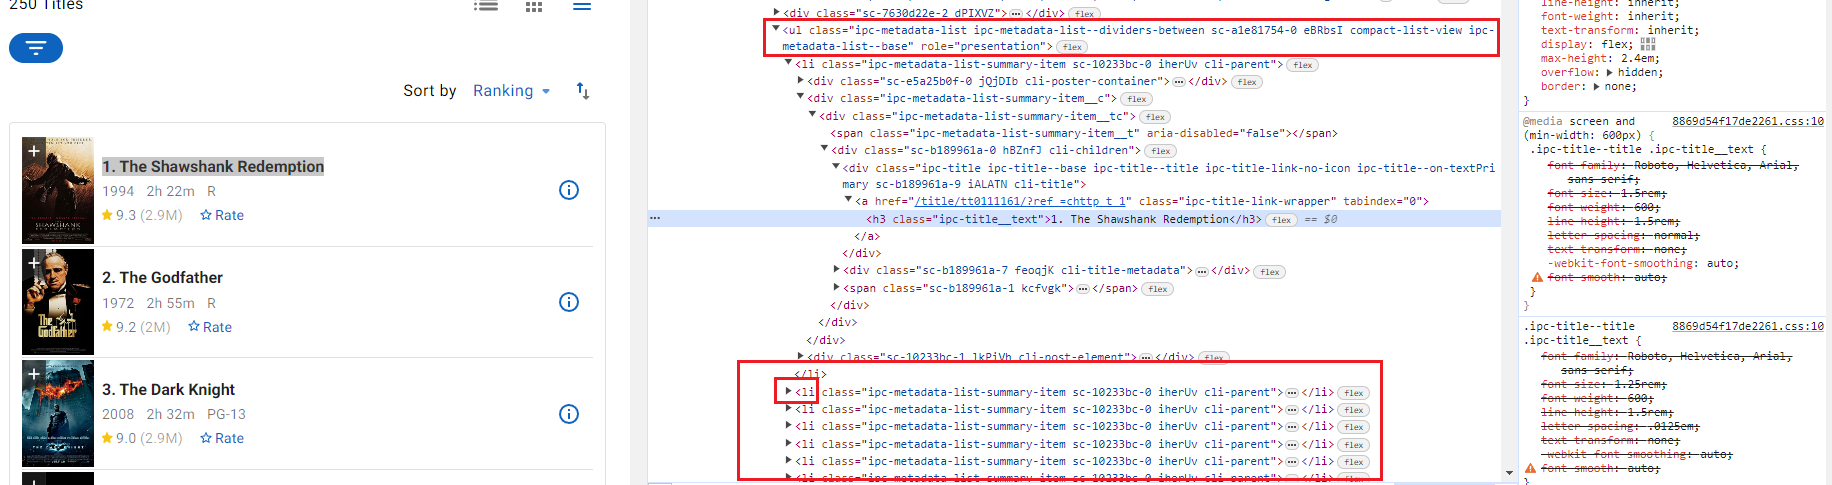

### **Scraping** - Extraindo o conteudo:

In [4]:
conteudo_extraido = []

for coluna in movies[:10]:  # este[:10] é um slicing, faz a interação do laço for 10 vezes (coleta o top 10)
    textos_coluna = coluna.get_text(';').strip().split(sep= ';')
    textos_coluna = textos_coluna[0].split(".") + textos_coluna[1:]
    conteudo_extraido.append(textos_coluna)

for filme in conteudo_extraido:
    print(filme)

['1', ' Um Sonho de Liberdade', '1994', '2h 22m', '16', '9.3', '\xa0(', '2.9M', ')', 'Rate']
['2', ' O Poderoso Chefão', '1972', '2h 55m', '14', '9.2', '\xa0(', '2M', ')', 'Rate']
['3', ' Batman: O Cavaleiro das Trevas', '2008', '2h 32m', '12', '9.0', '\xa0(', '2.9M', ')', 'Rate']
['4', ' O Poderoso Chefão II', '1974', '3h 22m', '14', '9.0', '\xa0(', '1.4M', ')', 'Rate']
['5', ' 12 Homens e uma Sentença', '1957', '1h 36m', 'Livre', '9.0', '\xa0(', '870K', ')', 'Rate']
['6', ' A Lista de Schindler', '1993', '3h 15m', '14', '9.0', '\xa0(', '1.5M', ')', 'Rate']
['7', ' O Senhor dos Anéis: O Retorno do Rei', '2003', '3h 21m', '14', '9.0', '\xa0(', '2M', ')', 'Rate']
['8', ' Pulp Fiction: Tempo de Violência', '1994', '2h 34m', '18', '8.9', '\xa0(', '2.2M', ')', 'Rate']
['9', ' O Senhor dos Anéis: A Sociedade do Anel', '2001', '2h 58m', '12', '8.9', '\xa0(', '2M', ')', 'Rate']
['10', ' Três Homens em Conflito', '1966', '2h 41m', '14', '8.8', '\xa0(', '814K', ')', 'Rate']


Esta linha de código basicamente está dividindo o elemento de índice 0 da lista "textos_coluna", usando o separador "." (textos_coluna[0].split(".")).

Sem esta divisão, fica assim:

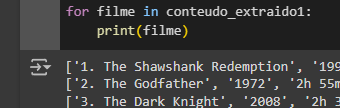

Essa operação foi realizada para conseguir separar os dados correspondentes a "ranking" e "título", visto que eles são retornados como uma única string.

Em seguida todo o restante da lista, desde o índice 1 até o final dela (textos_coluna[1:]), é concatenado ao resultado dessa operação. Note que "[1:]" é o processo de fatiamento de lista.

Para a extração das colunas de interesse (ranking, titulo, ano e nota), tem-se os métodos:

In [12]:
# METODO 1
  # Extraindo direto na lista correta

conteudo_extraido2 = []

for coluna in movies[:10]:  # este[:10] faz a interação do laço for 10 vezes (coleta o top 10)
    textos_coluna = coluna.get_text(';').strip().split(sep= ';')
    textos_coluna = textos_coluna[0].split(".") + textos_coluna[1:]
    conteudo_extraido2.append([textos_coluna[0], textos_coluna[1], textos_coluna[2], textos_coluna[5]])

for filme in conteudo_extraido2:
    print(filme)

['1', ' Um Sonho de Liberdade', '1994', '9.3']
['2', ' O Poderoso Chefão', '1972', '9.2']
['3', ' Batman: O Cavaleiro das Trevas', '2008', '9.0']
['4', ' O Poderoso Chefão II', '1974', '9.0']
['5', ' 12 Homens e uma Sentença', '1957', '9.0']
['6', ' A Lista de Schindler', '1993', '9.0']
['7', ' O Senhor dos Anéis: O Retorno do Rei', '2003', '9.0']
['8', ' Pulp Fiction: Tempo de Violência', '1994', '8.9']
['9', ' O Senhor dos Anéis: A Sociedade do Anel', '2001', '8.9']
['10', ' Três Homens em Conflito', '1966', '8.8']


In [7]:
# METODO 2 -
  # Colocando a extração em variaveis:

ranking = []
titulo = []
ano = []
nota = []

for elemento in conteudo_extraido:
  ranking.append(elemento[0])
  titulo.append(elemento[1])
  ano.append(elemento[2])
  nota.append(elemento[5])

print(ranking)
print(titulo)
print(ano)
print(nota)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
[' Um Sonho de Liberdade', ' O Poderoso Chefão', ' Batman: O Cavaleiro das Trevas', ' O Poderoso Chefão II', ' 12 Homens e uma Sentença', ' A Lista de Schindler', ' O Senhor dos Anéis: O Retorno do Rei', ' Pulp Fiction: Tempo de Violência', ' O Senhor dos Anéis: A Sociedade do Anel', ' Três Homens em Conflito']
['1994', '1972', '2008', '1974', '1957', '1993', '2003', '1994', '2001', '1966']
['9.3', '9.2', '9.0', '9.0', '9.0', '9.0', '9.0', '8.9', '8.9', '8.8']


In [10]:
# METODO 3
  # Criação de variavel que junta todas as listas anteriores:

imdb = []
for i in range(10):
  imdb.append([ranking[i], titulo[i], ano[i], nota[i]])

for elemento in imdb:
    print(elemento)

['1', ' Um Sonho de Liberdade', '1994', '9.3']
['2', ' O Poderoso Chefão', '1972', '9.2']
['3', ' Batman: O Cavaleiro das Trevas', '2008', '9.0']
['4', ' O Poderoso Chefão II', '1974', '9.0']
['5', ' 12 Homens e uma Sentença', '1957', '9.0']
['6', ' A Lista de Schindler', '1993', '9.0']
['7', ' O Senhor dos Anéis: O Retorno do Rei', '2003', '9.0']
['8', ' Pulp Fiction: Tempo de Violência', '1994', '8.9']
['9', ' O Senhor dos Anéis: A Sociedade do Anel', '2001', '8.9']
['10', ' Três Homens em Conflito', '1966', '8.8']


In [22]:
# Por que formando uma lista (imdb) com as listas (ranking, titulo, ano e nota) não deu certo?

imdb2 = []
imdb2.append(ranking)
imdb2.append(titulo)
imdb2.append(ano)
imdb2.append(nota)

for elemento in imdb2:
    print(elemento)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
[' Um Sonho de Liberdade', ' O Poderoso Chefão', ' Batman: O Cavaleiro das Trevas', ' O Poderoso Chefão II', ' 12 Homens e uma Sentença', ' A Lista de Schindler', ' O Senhor dos Anéis: O Retorno do Rei', ' Pulp Fiction: Tempo de Violência', ' O Senhor dos Anéis: A Sociedade do Anel', ' Três Homens em Conflito']
['1994', '1972', '2008', '1974', '1957', '1993', '2003', '1994', '2001', '1966']
['9.3', '9.2', '9.0', '9.0', '9.0', '9.0', '9.0', '8.9', '8.9', '8.8']


Este metodo esta fornecendo uma lista com 40 elementos em que os primeiros 10 elementos são os dados de ranking, os próximos 10 são os dados de título, os outros 10 são os de ano e os últimos 10 são os dados de nota.

A primeira lista não contém 4 elementos (não está no formato esperado: Primeiro, porque a lista não contém listas de 4 elementos como o cabeçalho, e segundo por não estarem na ordem) e só possui os dados de ranking, mas deveria ter um valor de ranking, um de título, um de ano e um de nota. A segunda, terceira e quarta lista de 'imdb' possui o mesmo problema da primeira.

Se você quiser juntar as 4 listas na lista 'imdb', então você precisa adicionar listas de 4 elementos em que o primeiro elemento é dado de ranking, o segundo é dado de título, o terceiro é de ano e o quarto é de nota.

### Elaboração de arquivo CSV contendo o conteudo extraido:

In [8]:
# Método 1:

import csv
with open(file='imdb.csv', mode='w', encoding='utf8') as fp:
  escritor_csv = csv.writer(fp, delimiter=',')
  escritor_csv.writerows([['ranking', 'titulo', 'ano', 'nota']] + list(map(lambda a, b, c, d: [a, b, c, d], ranking, titulo, ano, nota)))

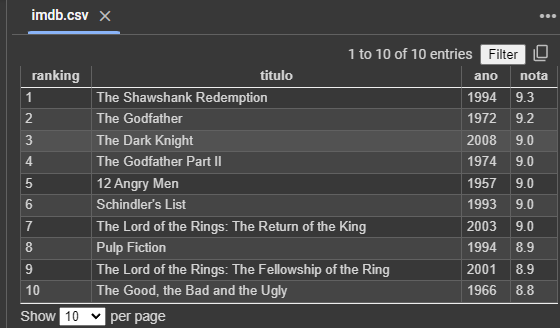

In [11]:
# Metodo 2:
  # Descrevendo o cabeçalho em lista:

header = [
  'ranking',
  'titulo',
  'ano',
  'nota'
]


import csv
with open(file='imdb2.csv', mode='w', encoding='utf8') as fp:
  escritor_csv = csv.writer(fp, delimiter=',')
  escritor_csv.writerows([header] + imdb)

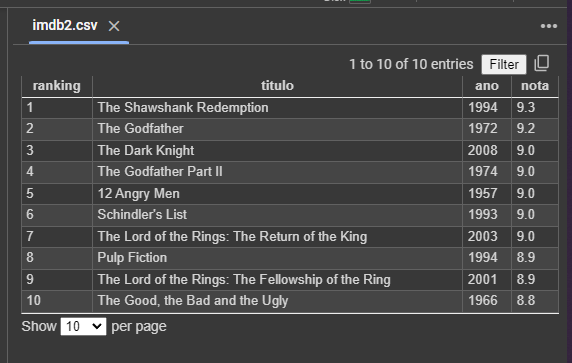

In [13]:
# METODO 3:
  # É possivel usar a concatenação com qualquer lista que esteja em formato adequado, independente do método de extração:

import csv
with open(file='imdb3.csv', mode='w', encoding='utf8') as fp:
  escritor_csv = csv.writer(fp, delimiter=',')
  escritor_csv.writerows([['ranking', 'titulo', 'ano', 'nota']] + conteudo_extraido2)

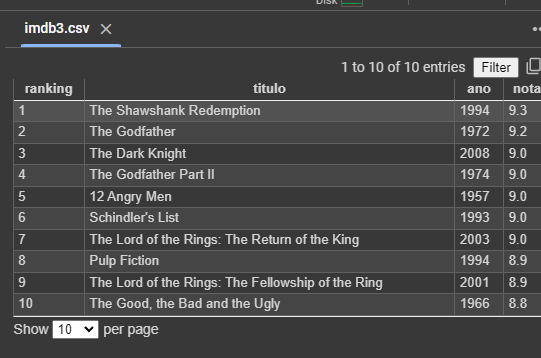

Entendendo erros:

In [14]:
# Funcionamento do método map(lambda())
  # Transforma cada elemento do ranking em uma lista separada
  # O formato correto é uma lista em que cada elemento é uma lista com os dados na ordem desejada.

teste = list(map(lambda a: [a], ranking))
print(teste)

[['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9'], ['10']]


Quando você fornece uma lista para o cabeçalho com 4 colunas (ranking, titulo, ano e nota), ele espera uma estrutura com 4 elementos com os valores de ranking, titulo, ano e nota nesta ordem.

Neste caso, você utilizou a função 'map' que juntou um elemento de cada lista na ordem: ranking, titulo, ano e nota. Para construir a primeira lista com os elementos fornecidos, o 'map' fez o seguinte:

Pegou o primeiro elemento de ranking e colocou na primeira posição da lista, pegou o primeiro elemento de título e colocou na segunda posição da lista, pegou o primeiro elemento de ano e colocou na terceira posição da lista, e por fim, pegou o primeiro elemento de nota e colocou na quarta posição da lista .

Para formar a segunda lista com os elementos de ranking, título, ano e nota, ele vai fazer o mesmo processo, mas, agora, pegando o segundo elemento de cada e colocando em ordem.

In [15]:
import csv
with open(file='imdb4.csv', mode='w', encoding='utf8') as fp:
  escritor_csv = csv.writer(fp, delimiter=',')
  escritor_csv.writerows([['ranking', 'titulo', 'ano', 'nota']] + [[ranking] + [titulo] + [ano] + [nota]])

  # Neste trecho, não tenho uma lista em que cada elemento dela é uma lista!!
  # Aqui é um exemplo do arquivo sem que as informações não estejam no formato desejado

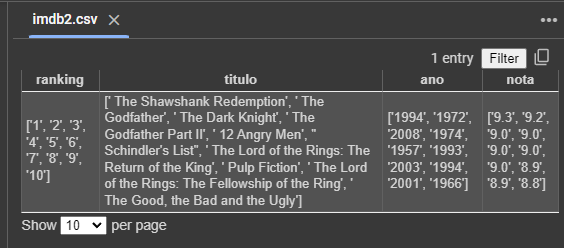

In [16]:
import csv
with open(file='imdb5.csv', mode='w', encoding='utf8') as fp:
  escritor_csv = csv.writer(fp, delimiter=',')
  escritor_csv.writerows([['ranking', 'titulo', 'ano', 'nota']] + ranking + titulo + ano + nota)

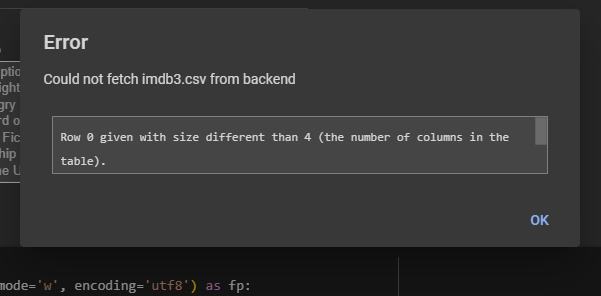

Por que, concatenando as listas dessa forma  não deu certo?

Quando você concatena as listas 'ranking', 'titulo', 'ano' e 'nota', você fornece novamente uma lista com 40 elementos em que os primeiros 10 elementos são os dados de ranking, os próximos 10 são os dados de título, os outros 10 são os de ano e os últimos 10 são os dados de nota:

In [17]:
print(ranking + titulo + ano + nota)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', ' Um Sonho de Liberdade', ' O Poderoso Chefão', ' Batman: O Cavaleiro das Trevas', ' O Poderoso Chefão II', ' 12 Homens e uma Sentença', ' A Lista de Schindler', ' O Senhor dos Anéis: O Retorno do Rei', ' Pulp Fiction: Tempo de Violência', ' O Senhor dos Anéis: A Sociedade do Anel', ' Três Homens em Conflito', '1994', '1972', '2008', '1974', '1957', '1993', '2003', '1994', '2001', '1966', '9.3', '9.2', '9.0', '9.0', '9.0', '9.0', '9.0', '8.9', '8.9', '8.8']


## Conclusão

Nesta tarefa, a utilização do pacote requests para fazer uma requisição HTTP ao IMDB simula o uso de uma Web API para obter dados. Embora o IMDB não tenha sido acessado através de uma API oficial, o processo de fazer uma requisição a um serviço web, receber dados (neste caso, HTML), e processá-los para uso em outra aplicação (escrita em um arquivo CSV), exemplifica como as Web APIs facilitam a comunicação e integração entre sistemas diferentes.

